In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from matplotlib.pylab import pcolor, colorbar, plot

In [3]:
base = pd.read_csv('bases/wines.csv')
base

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
X = base.iloc[:, 1:14].values
y = base.iloc[:, 0].values

In [6]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [7]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [10]:
normalizer = MinMaxScaler(feature_range=(0, 1))
X = normalizer.fit_transform(X)
X

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.08943089, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.09756098, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.10569106, 0.12087912,
        0.20114123]])

# **Mapa Auto-organizázel**

In [13]:
5 * np.sqrt(base.shape[0])

66.70832032063167

In [16]:
som = MiniSom(x=8, y=8, input_len=X.shape[1], sigma=1.0, learning_rate=0.5, random_seed=2)

In [17]:
som.random_weights_init(X)

In [38]:
som.train_random(data=X, num_iteration=1000)

In [39]:
som._weights

array([[[0.79622706, 0.49587392, 0.55713762, 0.24791461, 0.4424775 ,
         0.71358675, 0.58849965, 0.18428371, 0.49983723, 0.32972683,
         0.40803379, 0.78605057, 0.48366519],
        [0.70018598, 0.19849926, 0.44954709, 0.30069366, 0.43026801,
         0.72670835, 0.59797925, 0.24891619, 0.53541581, 0.38656852,
         0.36432736, 0.76528232, 0.46059701],
        [0.62163805, 0.19212154, 0.6784324 , 0.67101021, 0.61748944,
         0.72209331, 0.54052958, 0.36294363, 0.43483604, 0.26268143,
         0.60374075, 0.76610554, 0.52034261],
        [0.39180032, 0.29917478, 0.89504769, 0.7180219 , 0.52413992,
         0.66079302, 0.68895766, 0.57862542, 0.45085156, 0.30480311,
         0.43519252, 0.72936549, 0.25962808],
        [0.27410184, 0.30002112, 0.65797894, 0.71048525, 0.25329848,
         0.32941856, 0.36524569, 0.86669113, 0.36111775, 0.15017016,
         0.41186424, 0.54350145, 0.11641177],
        [0.18245942, 0.14760646, 0.52110294, 0.57433434, 0.21380025,
         0.

In [40]:
som._weights.shape

(8, 8, 13)

In [41]:
som._activation_map.shape

(8, 8)

In [42]:
q = som.activation_response(X)
q

array([[3., 7., 1., 3., 3., 4., 4., 3.],
       [4., 4., 5., 1., 4., 2., 5., 6.],
       [4., 5., 4., 0., 4., 2., 3., 5.],
       [5., 6., 0., 2., 6., 1., 1., 1.],
       [0., 3., 0., 3., 5., 1., 1., 5.],
       [2., 0., 2., 6., 3., 3., 0., 3.],
       [2., 3., 0., 3., 3., 3., 1., 2.],
       [3., 3., 0., 3., 2., 3., 0., 2.]])

In [43]:
q.shape

(8, 8)

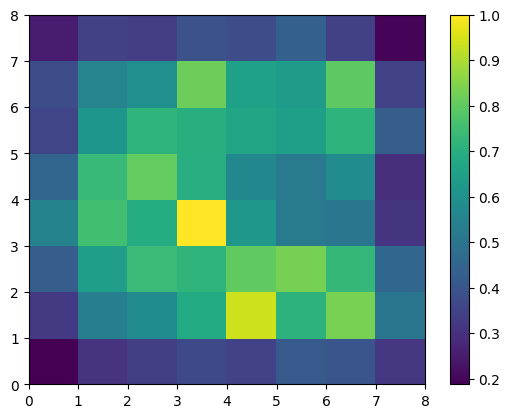

In [44]:
pcolor(som.distance_map().T)
colorbar(); # MID - Mean Inter-neuron Distance

In [45]:
w = som.winner(X[2])
w

(3, 0)

In [46]:
markers = ['o', 's', 'D',]
color = ['r', 'g', 'b']

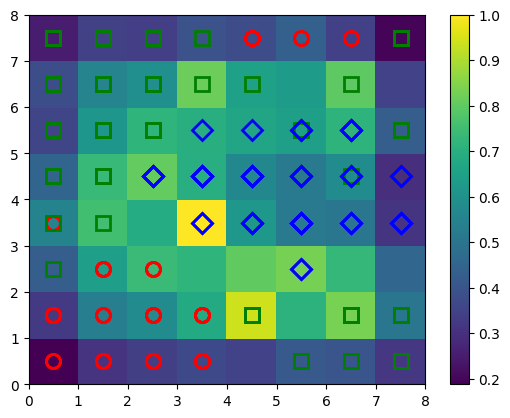

In [48]:
pcolor(som.distance_map().T)
colorbar()

for i, x in enumerate(X):
    w = som.winner(x)
    plot(
        w[0] + 0.5, 
        w[1] + 0.5, 
        markers[y[i] - 1], 
        markerfacecolor='None', 
        markeredgecolor=color[y[i]-1], 
        markeredgewidth=2, 
        markersize=10
    )